# Feature Selection Challenge

> COM2004/COM3004

*Copyright &copy; 2022 University of Sheffield. All rights reserved*.

## Objective

You will be using data from a character recognition task where each character is represented by 900 pixels.

The objective is to find a subset of 10 pixels that provide a good classification score. This will be done by using feature selection ideas. Some tools have been provided. This notebook will lead you through the initial steps to get you started.


## Background

One drawback of the nearest-neighbour classifier is that it has to store the complete training set in memory. This can be a problem if the feature vectors are large and memory is in short supply (e.g., in embedded systems). A further problem is that computing distances between large feature vectors can be computationally costly. It is therefore desirable to reduce the size of the feature vector. In this notebook we are going to use feature selection to reduce the size of the feature vector from 900 to just 10 (i.e., 90 times less memory, 90 times less computation). It is important that we choose the 10 features carefully so that we do not lose too much classification performance.

## 1. Overview of key functions

The notebook will use three main functions. Code for these functions is included in the notebook.

* `classify` – a nearest neighbour classifier
* `divergence` – for measuring 1-D divergence
* `multidivergence` – for measuring multi-dimensional divergence

## 2. Loading the data

The data for the lab class is a set of images of characters. Each image is a square of 30 by 30 pixels, i.e., 900 pixels in total. The images can therefore be presented by 900 pixel values stored in a vector.

The data for the lab have been stored as entries in a Python dictionary which has been saved in a Python 'pickle' file. The dictionary contains separate entries for a predified training set, a test set, training set labels and test set labels. The code in the cell below reads the pickle file and extracts the data from the dictionary into separate variables.

In [1]:
import pickle
import numpy as np

lab_data = pickle.load(open("data/lab_data_wk6.pkl", "rb"))
train_labels = lab_data["train_labels"]
test_labels = lab_data["test_labels"]
train_data = lab_data["train_data"]
test_data = lab_data["test_data"]

The numpy arrays `train_data` and `test_data` contain the character image data. In these arrays, each row represents one character and contains that character's 900 pixel values, i.e., the arrays have 900 columns. There are 699 training characters and 200 for testing.

To display a character as an image we first need to reshape the row of 900 pixel values into a 30 by 30 element matrix. We can do this using numpy's `reshape` function. We can then display the resulting matrix as an image by using matplotlib's `matshow` function.

Execute the cell below to display the first character in the training data. Then try editting and re-excuting the cell to display other characters.

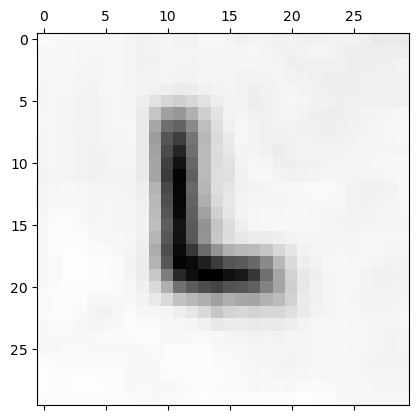

In [3]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# display the 4th training data sample
letter_image = np.reshape(train_data[3, :], (30, 30), order="F")
plt.matshow(letter_image, cmap=cm.Greys_r)

In the cell below write code to display the first 16 training samples as a grid of 4x4 subplots.

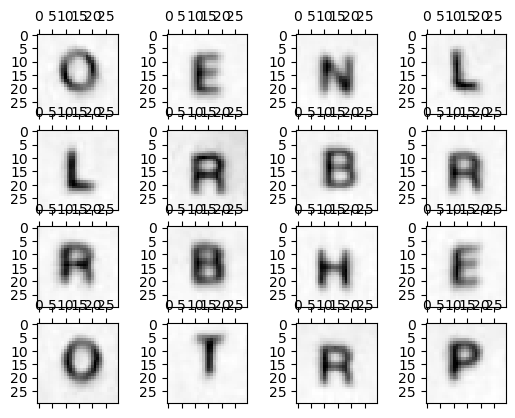

In [4]:
# SOLUTION
for i in range(16):
    axis = plt.subplot(4, 4, i + 1)
    letter_image = np.reshape(train_data[i, :], (30, 30), order="F")
    axis.matshow(letter_image, cmap=cm.Greys_r)

The variables called `train_labels` and `test_labels` store the character labels. The labels are represented using integers with 1=A, 2=B, 3=C, etc.

The labels are stored in a numpy array with 1 row and either 699 or 200 columns for the training and test data respectively. We can print the label for the Nth character in the training set by typing,

    print(train_labels[0, N - 1])

So, for example, to display the label of the 10$th$ character, we can use,

In [6]:
print(train_labels[0, 9])

2


Display the 10'th character image to check that it corresponds to the label.

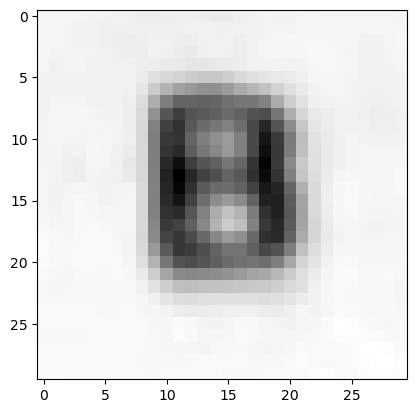

In [7]:
# SOLUTION
letter_image = np.reshape(train_data[9, :], (30, 30), order="F")
plt.imshow(letter_image, cmap=cm.Greys_r)

## 3. Using the classify function

The cell below provides a function that performs nearest neighbour classification.

In [8]:
def classify(train, train_labels, test, test_labels, features=None):
    """Nearest neighbour classification.
    
    train - data matrix storing training data, one sample per row
    train_label - a vector storing the training data labels
    test - data matrix storing the test data
    test_lables - a vector storing the test data labels for evaluation
    features - a vector if indices that select the feature to use
             if features=None then all features are used
             
    returns: (score, confusions) - a percentage correct and a 
                                  confusion matrix
    """

    # Use all feature is no feature parameter has been supplied
    if features is None:
        features = np.arange(0, train.shape[1])

    # Select the desired features from the training and test data
    train = train[:, features]
    test = test[:, features]

    # Super compact implementation of nearest neighbour
    x = np.dot(test, train.transpose())
    modtest = np.sqrt(np.sum(test * test, axis=1))
    modtrain = np.sqrt(np.sum(train * train, axis=1))
    dist = x / np.outer(modtest, modtrain.transpose())
    # cosine distance
    nearest = np.argmax(dist, axis=1)
    mdist = np.max(dist, axis=1)
    label = train_labels[0, nearest]
    score = (100.0 * sum(test_labels[0, :] == label)) / label.shape[0]

    # Construct a confusion matrix
    nclasses = np.max(np.hstack((test_labels, train_labels)))
    confusions = np.zeros((nclasses, nclasses))
    for i in range(test_labels.shape[1]):
        confusions[test_labels[0, i] - 1, label[i] - 1] += 1

    return score, confusions

The code is quite compact and is a little hard to understand. It has been written in a way that avoids using loops which ensures that it runs as quickly as possible. It is using a cosine distance rather than the more commonly-employed Euclidean distance. (The cosine distance is based on the angle between a pair of feature vectors rather than the distance between points.)

Try out the code by executing the cell below,

95.0


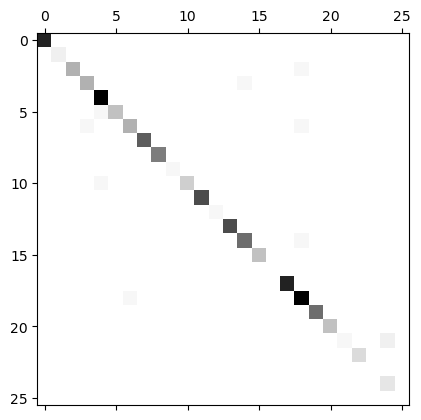

In [9]:
score, confusions = classify(train_data, train_labels, test_data, test_labels)
print(score)
plt.matshow(confusions, cmap=cm.Greys)

You should get a score of around 95%. This is a better result than would be achieved by a nearest neighbour classifier using a Euclidean distance. (Can you think why?)

The classify function can take a 5th argument: a vector of integers representing the indexes of features to be selected. For example, to test the classifier using just the 50th and 150th pixel in the image we can use,

    score, confusions = classify(train_data, train_labels, test_data, test_labels, [49, 149])

Try it out in the cell below. The performance should now be much lower!

4.5


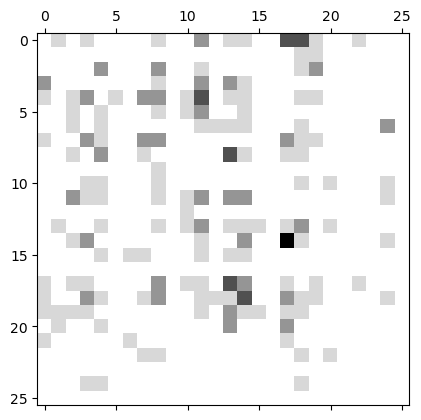

In [10]:
# SOLUTION
score, confusions = classify(
    train_data, train_labels, test_data, test_labels, [49, 149]
)
print(score)
plt.matshow(confusions, cmap=cm.Greys)

**COMPETITON:**

Your challenge is to find a vector of 10 feature indexes, such that,

    classify(train_data, train_labels, test_data, test_labels, features)

returns a result as close to 100% as possible.

**After the lab class email me your selection and if you get the best result you may win a prize!**

The rest of the notebook contains some tools and ideas that may help you.

## 4. Measuring Divergence

The cell below contains a function called `divergence` that computes the divergence between a pair of classes for each feature in the feature vector. As input it takes two parameters: the first is a matrix of data for class 1, and the second is a matrix of data for class 2. The output will be a vector of divergence scores, i.e., one score for each feature vector element.

Study the code carefully,

In [11]:
def divergence(class1, class2):
    """compute a vector of 1-D divergences
    
    class1 - data matrix for class 1, each row is a sample
    class2 - data matrix for class 2
    
    returns: d12 - a vector of 1-D divergence scores
    """

    # Compute the mean and variance of each feature vector element
    m1 = np.mean(class1, axis=0)
    m2 = np.mean(class2, axis=0)
    v1 = np.var(class1, axis=0)
    v2 = np.var(class2, axis=0)

    # Plug mean and variances into the formula for 1-D divergence.
    # (Note that / and * are being used to compute multiple 1-D
    #  divergences without the need for a loop)
    d12 = 0.5 * (v1 / v2 + v2 / v1 - 2) + 0.5 * (m1 - m2) * (m1 - m2) * (
        1.0 / v1 + 1.0 / v2
    )

    return d12

The first couple of lines are computing the means and variances of each of the 900 pixels for each class. The last line is using the formula for 1-D divergence, but it works on a vector of means and variances, so it can compute 900 1-D divergences in a single go without needing a loop.

The training data contains many classes (one class for each letter in the alphabet). However, divergence is measured between just a single pair of classes. So to use the divergence function we must first select feature vectors from `train_data` belonging to the pair of classes that we want to consider. This can be done using the `train_label` vector. For example, to select all the ‘A’s and ‘B’s run:

In [12]:
adata = train_data[train_labels[0, :] == 1, :]
bdata = train_data[train_labels[0, :] == 2, :]

Now we can measure the 900 separate 1-d divergences between the ‘A’ and ‘B’ class:

In [13]:
d12 = divergence(adata, bdata)
print(d12.shape)
print(d12)

(900,)
[0.27771884 0.39396238 0.38419476 0.34320584 0.3696043  0.3648096
 0.4082894  0.4112968  0.39464986 0.38921964 0.39691216 0.40344337
 0.40146214 0.3709038  0.37457147 0.3574832  0.36386162 0.34519187
 0.34453112 0.38943493 0.4131047  0.44362128 0.45869687 0.4304442
 0.43225464 0.45524675 0.4744264  0.45395553 0.45435217 0.4584308
 0.27247554 0.38974455 0.40015244 0.39104939 0.3913706  0.39638484
 0.43070316 0.41559416 0.3765804  0.36169457 0.37003878 0.37434763
 0.40659934 0.4207787  0.41486526 0.41006938 0.40527546 0.3960733
 0.3865289  0.40571994 0.40066984 0.44177657 0.46114436 0.44142818
 0.45797428 0.49054682 0.50222844 0.4780033  0.4403792  0.45304337
 0.2490616  0.35762948 0.3898954  0.38422382 0.39534113 0.39012462
 0.40832943 0.42746672 0.4085818  0.39003292 0.3803289  0.38845584
 0.43958062 0.47459564 0.449462   0.4153954  0.3862487  0.379359
 0.3745584  0.39815968 0.414103   0.43917775 0.45804572 0.4454354
 0.42577967 0.47043112 0.4994422  0.48585376 0.4573956  0.4765

To see the divergences as an image execute the cell below,

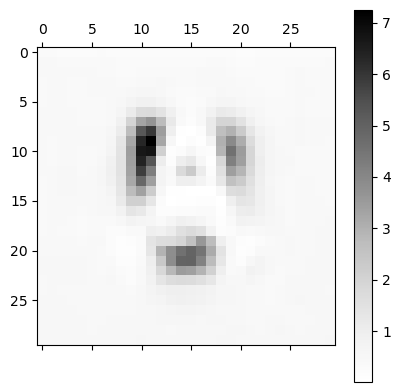

In [14]:
im = plt.matshow(np.reshape(d12, (30, 30), order="F"), cmap=cm.Greys)
# Add a colorbar to show the scale
plt.colorbar(im)

In the above we have considered the divergence between the classes 'A' and 'B'. Use the cell below to experiment with other character pairs.

[0.27771884 0.39396238 0.38419476 0.34320584 0.3696043  0.3648096
 0.4082894  0.4112968  0.39464986 0.38921964 0.39691216 0.40344337
 0.40146214 0.3709038  0.37457147 0.3574832  0.36386162 0.34519187
 0.34453112 0.38943493 0.4131047  0.44362128 0.45869687 0.4304442
 0.43225464 0.45524675 0.4744264  0.45395553 0.45435217 0.4584308
 0.27247554 0.38974455 0.40015244 0.39104939 0.3913706  0.39638484
 0.43070316 0.41559416 0.3765804  0.36169457 0.37003878 0.37434763
 0.40659934 0.4207787  0.41486526 0.41006938 0.40527546 0.3960733
 0.3865289  0.40571994 0.40066984 0.44177657 0.46114436 0.44142818
 0.45797428 0.49054682 0.50222844 0.4780033  0.4403792  0.45304337
 0.2490616  0.35762948 0.3898954  0.38422382 0.39534113 0.39012462
 0.40832943 0.42746672 0.4085818  0.39003292 0.3803289  0.38845584
 0.43958062 0.47459564 0.449462   0.4153954  0.3862487  0.379359
 0.3745584  0.39815968 0.414103   0.43917775 0.45804572 0.4454354
 0.42577967 0.47043112 0.4994422  0.48585376 0.4573956  0.47654325
 0

[2.32405290e-01 2.96824604e-01 2.93088168e-01 2.57858872e-01
 2.59925634e-01 2.84218252e-01 3.03942651e-01 2.92419165e-01
 2.79077232e-01 2.70385921e-01 2.60085493e-01 2.70750195e-01
 2.99499571e-01 2.99937576e-01 2.76492685e-01 2.54778653e-01
 2.69003063e-01 2.85152823e-01 3.12077969e-01 3.44672680e-01
 3.24625373e-01 3.27619731e-01 3.27146024e-01 3.28192830e-01
 3.43263924e-01 3.54689360e-01 3.65865707e-01 3.65594059e-01
 3.95443857e-01 3.92455637e-01 2.07943320e-01 2.71726340e-01
 2.79386938e-01 2.51584798e-01 2.59498030e-01 2.86274761e-01
 2.99130559e-01 2.73790181e-01 2.63819218e-01 2.68554628e-01
 2.73278266e-01 2.88441300e-01 3.04141521e-01 3.19017559e-01
 2.83454061e-01 2.61910647e-01 2.59018868e-01 2.80217350e-01
 3.02778661e-01 3.37904811e-01 3.51344228e-01 3.39383513e-01
 3.27227265e-01 3.44525337e-01 3.62505913e-01 3.78489137e-01
 3.83451819e-01 3.82875413e-01 3.60285550e-01 3.54029477e-01
 1.76184818e-01 2.23680109e-01 2.47366190e-01 2.56966680e-01
 2.53120720e-01 2.650200

[ 1.2344475   1.126965    1.0391196   0.97843635  0.96764344  0.94442135
  0.93510425  1.0185369   1.111598    1.1365781   1.0079364   0.93300194
  0.95294565  0.9076029   0.9726137   1.1780615   1.187187    1.3193421
  1.313242    1.3538234   1.4438713   1.5865259   1.3090233   1.1710678
  1.1530813   1.3099515   1.455238    1.3440652   1.3047197   1.3592498
  1.5113652   1.5698078   1.5370369   1.5719502   1.4821887   1.4221127
  1.3901348   1.4315621   1.4494516   1.517271    1.4138201   1.3075511
  1.2621347   1.126906    1.073106    1.1542875   1.4753419   1.5231795
  1.5852246   1.5493636   1.7174758   1.8252319   1.719568    1.5529528
  1.4821789   1.5285182   1.6031455   1.5620294   1.6836427   1.7884486
  1.6401657   1.7343674   1.6767311   1.8055966   1.6065334   1.488953
  1.542931    1.7205107   1.821595    1.7342789   1.5531121   1.3729004
  1.240117    1.3633556   1.2899494   1.2410178   1.5118276   1.6611927
  1.7235535   1.5115426   1.4847746   1.5972594   1.5896344   1

[9.47497189e-02 1.16182789e-01 1.33117422e-01 1.19301960e-01
 1.05756059e-01 9.47815627e-02 8.92199576e-02 8.92435461e-02
 9.92476493e-02 8.91652405e-02 8.24342519e-02 8.51327628e-02
 1.06987759e-01 1.02594145e-01 9.42219049e-02 8.26521814e-02
 8.76951069e-02 9.66697335e-02 1.05557710e-01 1.17827773e-01
 1.09427407e-01 9.69813392e-02 1.01147011e-01 1.07439086e-01
 1.14639401e-01 1.19001374e-01 1.33856893e-01 1.47205561e-01
 1.44930691e-01 1.39884442e-01 8.76131207e-02 1.07018970e-01
 1.22488126e-01 1.14968106e-01 1.06615558e-01 9.53017920e-02
 9.35330093e-02 9.20603424e-02 9.13465321e-02 8.63715634e-02
 8.93383995e-02 8.93268064e-02 1.04098275e-01 1.07263312e-01
 9.94055867e-02 8.50100070e-02 9.20941383e-02 1.06668271e-01
 1.05586641e-01 1.12926826e-01 1.12094849e-01 1.12429395e-01
 1.07934162e-01 1.16778314e-01 1.31457552e-01 1.36175185e-01
 1.47888705e-01 1.55041993e-01 1.35911047e-01 1.30513728e-01
 8.89437497e-02 9.75187868e-02 1.16901688e-01 1.15439489e-01
 1.09927677e-01 1.015544

[1.37509242e-01 1.44263431e-01 1.26650184e-01 1.01113379e-01
 9.16616619e-02 9.38629583e-02 1.07494645e-01 1.05755769e-01
 9.19381902e-02 8.54806453e-02 8.06067064e-02 7.70812109e-02
 9.70197245e-02 1.05786957e-01 1.12684160e-01 9.89506915e-02
 8.62063766e-02 7.85046965e-02 9.01580751e-02 1.01253219e-01
 1.13681994e-01 1.16361886e-01 1.09321438e-01 1.21534064e-01
 1.49084494e-01 1.64163977e-01 1.38225004e-01 1.06821992e-01
 1.03486344e-01 1.03415661e-01 1.21446230e-01 1.27455384e-01
 1.23322576e-01 1.01085886e-01 9.40809920e-02 9.21726897e-02
 9.52286869e-02 9.78716239e-02 9.58014131e-02 9.69976038e-02
 9.18087661e-02 8.71086270e-02 1.01047620e-01 1.18442044e-01
 1.24685124e-01 1.09826498e-01 9.90914479e-02 1.00615673e-01
 9.86402035e-02 1.05516218e-01 1.14668012e-01 1.28711179e-01
 1.20411649e-01 1.34565979e-01 1.61251307e-01 1.64564744e-01
 1.43447876e-01 1.08075842e-01 8.94179642e-02 1.01408958e-01
 1.00403212e-01 1.10764042e-01 1.18690267e-01 1.16473846e-01
 1.00691006e-01 9.435214

[2.03743652e-01 2.52609998e-01 2.34445512e-01 1.99065045e-01
 2.01864854e-01 2.31549144e-01 2.26818442e-01 2.07213163e-01
 1.96761042e-01 1.76077738e-01 1.85818285e-01 1.60377577e-01
 1.60382673e-01 1.67987496e-01 1.58937097e-01 1.18309401e-01
 1.24440424e-01 1.40399218e-01 1.68445587e-01 2.19047219e-01
 2.46929929e-01 2.46137857e-01 2.32260466e-01 2.23075792e-01
 2.23975718e-01 2.22534835e-01 2.33873948e-01 2.33443558e-01
 1.87845856e-01 7.97436833e-02 1.91720650e-01 2.43907556e-01
 2.58985490e-01 2.37886041e-01 2.45891482e-01 2.65225023e-01
 2.39126131e-01 1.99400023e-01 1.77972168e-01 1.83672637e-01
 1.80175766e-01 1.55266359e-01 1.57985598e-01 1.66418537e-01
 1.60773054e-01 1.26482710e-01 1.40809014e-01 1.66844711e-01
 1.78171307e-01 2.14409009e-01 2.46098563e-01 2.32085913e-01
 2.20097914e-01 2.30127975e-01 2.34375328e-01 2.26493359e-01
 2.34470844e-01 2.36442283e-01 1.71747670e-01 7.87640586e-02
 1.55263573e-01 2.23073721e-01 2.43974507e-01 2.49191523e-01
 2.46547550e-01 2.571840

[1.79617989e+00 1.66165364e+00 1.53806639e+00 1.27518201e+00
 1.29429793e+00 1.23039293e+00 1.28035557e+00 1.37405586e+00
 1.58158088e+00 1.61202884e+00 1.55544984e+00 1.45323324e+00
 1.56705403e+00 1.45874798e+00 1.15515673e+00 9.78168011e-01
 1.02152801e+00 1.09226596e+00 1.13078201e+00 1.42271185e+00
 1.57078433e+00 1.52153802e+00 1.51049495e+00 1.49780726e+00
 1.40876162e+00 1.33776903e+00 1.28551161e+00 1.30689657e+00
 1.26271796e+00 9.57116783e-01 1.83026314e+00 1.54369283e+00
 1.54159725e+00 1.43203986e+00 1.37938964e+00 1.33559954e+00
 1.36063492e+00 1.25242102e+00 1.48665428e+00 1.59837043e+00
 1.49199319e+00 1.41765308e+00 1.44460273e+00 1.38734376e+00
 1.11665773e+00 9.97379959e-01 1.00129068e+00 1.08319235e+00
 1.18020046e+00 1.24856329e+00 1.26987934e+00 1.41299236e+00
 1.35822821e+00 1.34948409e+00 1.17479897e+00 1.12229812e+00
 1.12867129e+00 1.20637619e+00 1.11847532e+00 9.24175382e-01
 1.65122437e+00 1.41108823e+00 1.33535922e+00 1.33604467e+00
 1.20043707e+00 1.094251

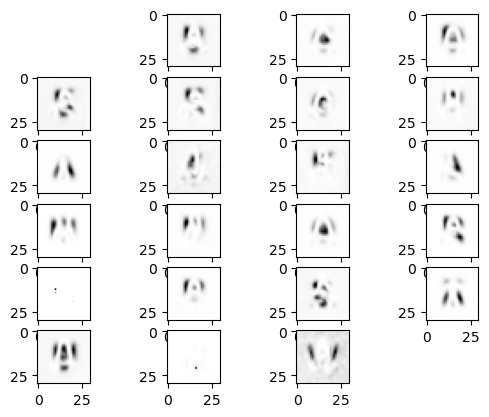

In [15]:
# SOLUTION
char1 = 1
char1_data = train_data[train_labels[0, :] == char1, :]
for char2 in np.arange(2, 24):
    axis = plt.subplot(6, 4, char2)
    char2_data = train_data[train_labels[0, :] == char2, :]
    d12 = divergence(char1_data, char2_data)
    print(d12)
    im = axis.imshow(np.reshape(d12, (30, 30), order="F"), cmap=cm.Greys)

## 5. Feature Selection

Let’s say that we now want to select features that will be good for separating 'A’s and 'B’s. We need to choose features with high divergence. To do this we will sort the divergence values, `d12`, and look at the indexes of the highest values. We can do this with the numpy `argsort` function,

In [16]:
sorted_indexes = np.argsort(-d12)

(Why are we sorting `–d12` and not `d12`?)

The simplest feature selection algorithm would then just take the 10 features with highest divergences, i.e., the first 10 entries in the indexes vector. Type:

In [17]:
features = sorted_indexes[0:9]
score, confusions = classify(train_data, train_labels, test_data, test_labels, features)
print(score)
features

45.5


array([672, 671, 252, 644, 643, 253, 673, 642, 670], dtype=int64)

The overall performance might not be very good. Remember the features have only been selected on the basis of how well they separate 'A' and 'B'. The other 24 letters have not been considered.

To examine the performance of the classifier in more detail we can look at a confusion matrix.

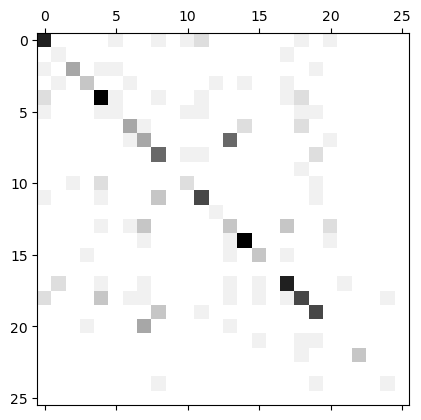

In [18]:
plt.matshow(confusions, cmap=cm.Greys)

If you look at the matrix you should see that not all the A’s and B’s have been correctly classified, but there are at least no cases of A’s mistaken for B’s or vice versa.

In [19]:
print(confusions[0, 1])  # number of A's mistaken as B's
print(confusions[1, 0])  # number of B's mistaken as A's

0.0
0.0


## 6. Improving the Feature Selection

*i) Two classes versus many classes*

To get a good overall classification score you need to find a set of features that have high divergence scores not just with respect to the A and B class, but for every pair of letters. Look again at Section 4 and consider how you might use a nested loop to call divergence repeatedly in such a way that you compute divergence between every pair of letters.

How might all these pairwise scores be combined to compute some overall divergence score?

Try constructing a multi-class divergence score and using it to select 10 features. Does the overall recognition score improve?

In [20]:
# SOLUTION
d = 0
for char1 in np.arange(1, 24):
    char1_data = train_data[train_labels[0, :] == char1, :]
    for char2 in np.arange(char1+1, 24):
        char2_data = train_data[train_labels[0, :] == char2, :]
        d12 = divergence(char1_data, char2_data)
        d = d + d12
        sorted_indexes = np.argsort(-d)
        features = sorted_indexes[0:9]

features

array([314, 312, 619, 616, 313, 617, 618, 588, 454], dtype=int64)

61.0


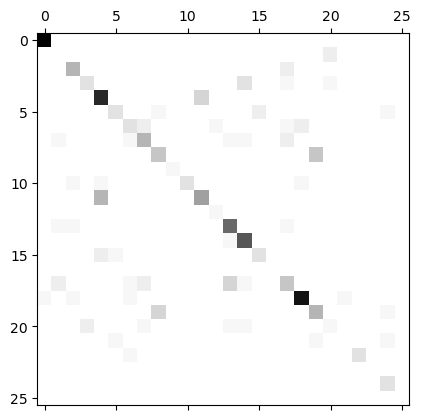

In [90]:
features
score, confusions = classify(train_data, train_labels, test_data, test_labels, features)
print(score)
plt.matshow(confusions, cmap=cm.Greys)

*ii) Correlation between features*

Remember, when features are correlated, we can not reliably estimate the overall divergence of a set of features by simply summing the divergences of each individual feature. If features are correlated then the overall divergence measured with the set of features will be less than the sum of the divergences measures with individual diveregences.

It turns out that there are indeed strong correlations between some pairs of pixel values. You can compute the correlation between each pair of features and store the results in a 900 $\times$ 900 matrix using,

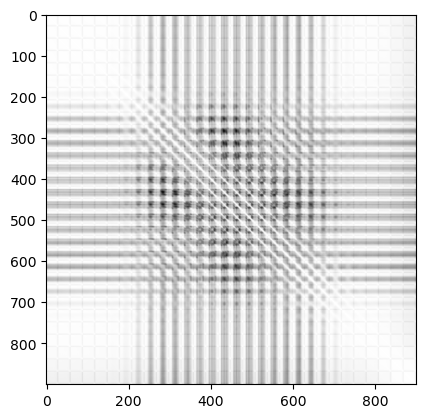

In [21]:
corr = np.corrcoef(train_data, rowvar=0)
plt.imshow(corr, cmap=cm.Greys_r)

(Can you explain the pattern of the corr image?)

So when selecting your 10 features we want to find features for which the divergence is high but which have low correlation, e.g. compare the correlation between pixels 1 and 2 with the correlation between pixels 322 and 338, i.e. type,

    print(corr[0, 1])
    print(corr[321, 337])

In the cell below, try implementing an algorithm that iteratively selects features that have a *penalised* divergence where the penalty is based on degree of correlation to previously selected features. (A version of this algorithm appears in the lecture notes.)

68.0


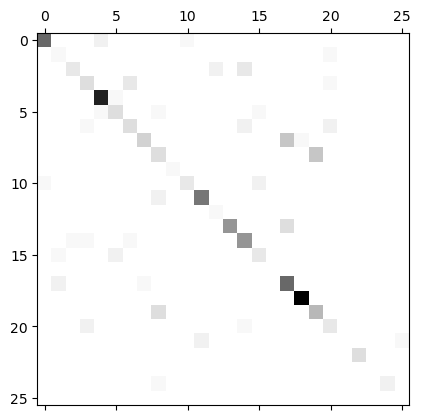

In [22]:
# SOLUTION
d = 0
corr_all = 0
corr = np.corrcoef(train_data, rowvar=0)
for char1 in np.arange(1, 24):
    char1_data = train_data[train_labels[0, :] == char1, :]
    for char2 in np.arange(char1+1, 24):
        char2_data = train_data[train_labels[0, :] == char2, :]
        d12 = divergence(char1_data, char2_data)
        d = d + d12
        sorted_indexes = np.argsort(-d)
        index1 = sorted_indexes[0]
        index2 = np.argmin(corr[index1,:])
        index3 = np.argmin(corr[index2,:])
        index4 = np.argmin(corr[index3,:])
        index5 = np.argmin(corr[index4,:])
        index6 = np.argmin(corr[index5,:index5])
        index7 = np.argmin(corr[index6,:])
        index8 = np.argmin(corr[index7,:])
        index9 = np.argmin(corr[index8,:])
        index10 = np.argmin(corr[index9,:index8])
        features = [index1, index2, index3, index4, index5, index6, index7, index8, index9, index10]

score, confusions = classify(train_data, train_labels, test_data, test_labels, features)
print(score)
plt.matshow(confusions, cmap=cm.Greys)

*iii) Multivariate divergence*

The function multidivergence below computes the divergence using the joint distribution of a set of features, while assuming that the data is normally distributed.

In [105]:
def multidivergence(class1, class2, features):
    """compute divergence between class1 and class2
    
    class1 - data matrix for class 1, each row is a sample
    class2 - data matrix for class 2
    features - the subset of features to use
    
    returns: d12 - a scalar divergence score
    """

    ndim = len(features)

    # compute mean vectors
    mu1 = np.mean(class1[:, features], axis=0)
    mu2 = np.mean(class2[:, features], axis=0)

    # compute distance between means
    dmu = mu1 - mu2

    # compute covariance and inverse covariance matrices
    cov1 = np.cov(class1[:, features], rowvar=0)
    cov2 = np.cov(class2[:, features], rowvar=0)

    icov1 = np.linalg.inv(cov1)
    icov2 = np.linalg.inv(cov2)

    # plug everything into the formula for multivariate gaussian divergence
    d12 = 0.5 * np.trace(
        np.dot(icov1, cov2) + np.dot(icov2, cov1) - 2 * np.eye(ndim)
    ) + 0.5 * np.dot(np.dot(dmu, icov1 + icov2), dmu)

    return d12

You can use the above function to estimate the divergence for a complete feature set as follows,

In [138]:
features = [4, 240, 452, 789]  # Pick 4 features
adata = train_data[train_labels[0, :] == 1, :]
bdata = train_data[train_labels[0, :] == 2, :]
d12 = multidivergence(adata, bdata, features)
print(d12)

2.6546293889183157


Using this function you could try implementing a sequential forward search e.g. first of all find the 1-feature that produces the highest divergence

    for i in range(nfeatures):
        d[i] = multidivergence(adata, bdata, [i])
    index1 = np.argmax(d)

Now try to find the best pair,

    d=zeros(1, nfeatures)
    for i in range(nfeatures):
      if i is not index1:
        d[i] = multidivergence(adata, bdata, [index1, i])
    index2 = np.argmax(d)
    [index1, index2]

Now repeat until you have found all 10.

Again, if you want to get a good overall classification result you will need to use the ideas used in Section 6 i) and sum the multidivergences over not just ‘A’ versus ‘B’ but over all letter pairs.

In [1]:
features = sorted_indexes.tolist()
nfeatures = len(features)
d_sum = np.zeros((900,))

for char1 in np.arange(1, 24):
    char1_data = train_data[train_labels[0, :] == char1, :]
    for char2 in np.arange(char1+1, 24):
        char2_data = train_data[train_labels[0, :] == char2, :]
        for i in range(nfeatures):
            d[i] = multidivergence(char1_data, char2_data, features)
            d_sum[i] = d_sum[i] + d[i]
index1 = np.argmax(d_sum)

d_sum = np.zeros((900,))
for char1 in np.arange(1, 24):
    char1_data = train_data[train_labels[0, :] == char1, :]
    for char2 in np.arange(char1+1, 24):
        char2_data = train_data[train_labels[0, :] == char2, :]
        for i in nfeatures:
            if i is not index1:
                d[i] = multidivergence(char1_data, char2_data, [index1, i])
                d_sum[i] = d_sum[i] + d[i]
index2 = np.argmax(d_sum)

NameError: name 'sorted_indexes' is not defined

## 7. Challenge

Find the 10 features that produce the best classification result. For example:

    features=[7, 74, 134, 162, 248, 278, 305, 741, 772, 821]
    score, confusions = classify(train_data, train_labels, test_data, test_labels, features)
    print(score)

Produces a score of 22.5%. This is not very good. It is possible to find sets of 10 features that produce classification scores of over 80%.

**Remember: If you find a good set then email me the indices after the lab class. The person with the best performing result may win a prize!**

